In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

sns.set_style('darkgrid')

# Understanding the problem
### there are two answers in this project that we need to provide
- 1st is to identify the reasons customers are leaving voluntarily
- 2nd is to create a machine learing model the would predict the probability that customers would churn 

In [4]:
# load the data set

cdf = pd.read_csv('customer.csv')

In [5]:
cdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

# Solving the first question

### Finding out the number of people who churn

In [7]:
cdf['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

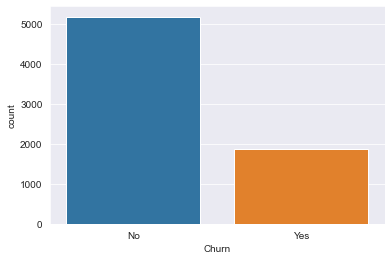

In [8]:
# count plot of the churn

sns.countplot(x= 'Churn', data=cdf)

#### churn yes means people who switched while churn no means people who didnt switch 
#### from the diagram above, the dataset tells us that most people do not switch tello companies.
#### we have to focus on the people who switched for the first question

# Finding out the reasons Customers defected through Exploratory Data Analysis

In [9]:
# converting columns with just yes and no to Zeros and ones

def tonumber(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    else:
        return None


a = ['Partner', 'PhoneService', 'Dependents', 'PaperlessBilling', 'Churn']

for x in a:
    cdf[x] = cdf[x].apply(tonumber)

In [10]:
# converting columns with yes, no, and somethin else to Ones, Zeros and -1 respectively

def reg(x):
    if x == 'No':
        return 0
    elif x == 'Yes':
        return 1
    else:
        return -1

next = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for x in next:
    cdf[x] = cdf[x].apply(reg)

In [11]:
cdf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,-1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,-1,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


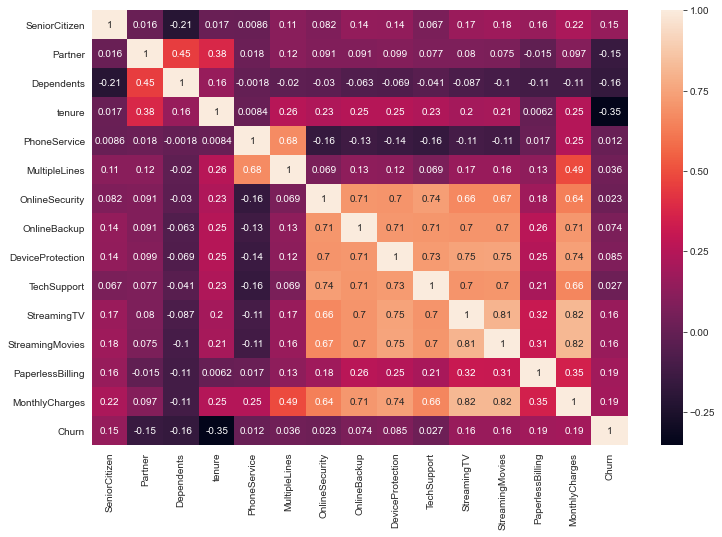

In [12]:
# plotting a heatmap
plt.figure(figsize=(12,8))

sns.heatmap(cdf.corr(), annot=True)

# Feature Selection

In [13]:
# Based on our heatmap results we can carry feature selection based on relationship with the churn decision 

cdf.corr()['Churn']

SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.036310
OnlineSecurity      0.023309
OnlineBackup        0.074205
DeviceProtection    0.084654
TechSupport         0.027037
StreamingTV         0.164673
StreamingMovies     0.163220
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [23]:
idx = cdf.corr()['Churn'].index
idy = cdf.corr()['Churn']

new = {x, y if x in idx and y in idy}

SyntaxError: invalid syntax (<ipython-input-23-059e5d6b9ece>, line 4)

## Extracting only the customers who churned from the original dataset

In [141]:
churned = cdf[cdf['Churn']==1]
churned.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
8,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,...,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
13,0280-XJGEX,Male,0,0,0,49,1,1,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,1


## Working on the 'Churned' Dataframe

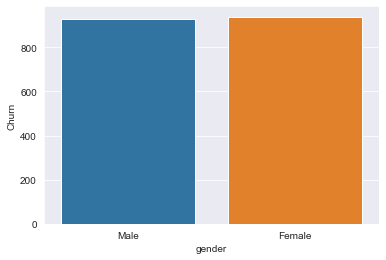

In [142]:
# compare the features to the churn value
# gender countplot

sns.barplot(x='gender', y='Churn', data=churned, estimator=sum)

In [143]:
churned['gender'].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

#### We can say that gender doesn't have any effect on customer defection

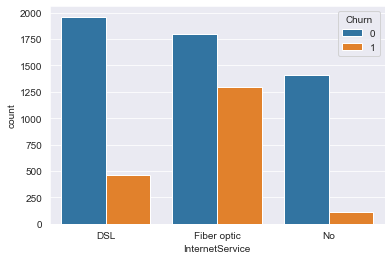

In [103]:
# internet countplot

sns.countplot(x='InternetService', data=churned, hue = 'Churn')

In [100]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
Male                7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtype

In [ ]:
#cdf.drop(['customerID', 'gender', 'Male', ])